**Метод Каси́ски (Метод Кази́ского)** — метод криптоанализа полиалфавитных шифров, таких как шифр Виженера. Основан на факте того, что повторяющиеся части открытого текста, зашифрованные одним и тем же ключевым словом, приводят к идентичным сегментам шифрованного текста. Разработан независимо криптоаналитиками Фридрихом Касиски и Чарльзом Бэббиджем.

Метод Касиски позволяет найти длину ключевого слова, используемого в полиалфавитном шифре. Как только длина ключевого слова обнаружена, криптоаналитик выстраивает зашифрованный текст в n колонках, где n — длина ключевого слова. Тогда каждую колонку можно рассматривать как зашифрованный моноалфавитным шифром текст, который можно подвергнуть частотному анализу.

[Wiki](https://ru.wikipedia.org/wiki/Метод_Касиски)

In [ ]:
from math import gcd
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Исходные данные:

text = 'It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters. My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last? Mr. Bennet replied that he had not. But it is, - returned she; - for Mrs. Long has just been here, and she told me all about it. Mr. Bennet made no answer. Do you not want to know who has taken it? - cried his wife impatiently. - You want to tell me, and I have no objection to hearing it. This was invitation enough. Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it, that he agreed with Mr. Morris immediately; that he is to take possession before Michaelmas, and some of his servants are to be in the house by the end of next week. What is his name? Bingley. Is he married or single? Oh! Single, my dear, to be sure! A single man of large fortune; four or five thousand a year. What a fine thing for our girls! How so? How can it affect them? My dear Mr. Bennet, replied his wife, how can you be so tiresome! You must know that I am thinking of his marrying one of them. Is that his design in settling here? Design! Nonsense, how can you talk so! But it is very likely that he may fall in love with one of them, and therefore you must visit him as soon as he comes. I see no occasion for that. You and the girls may go, or you may send them by themselves, which perhaps will be still better, for as you are as handsome as any of them, Mr. Bingley may like you the best of the party. My dear, you flatter me. I certainly have had my share of beauty, but I do not pretend to be anything extraordinary now. When a woman has five grown-up daughters, she ought to give over thinking of her own beauty. In such cases, a woman has not often much beauty to think of. But, my dear, you must indeed go and see Mr. Bingley when he comes into the neighbourhood. It is more than I engage for, I assure you. But consider your daughters. Only think what an establishment it would be for one of them. Sir William and Lady Lucas are determined to go, merely on that account, for in general, you know, they visit no newcomers. Indeed you must go, for it will be impossible for us to visit him if you do not. You are over-scrupulous, surely. I dare say Mr. Bingley will be very glad to see you; and I will send a few lines by you to assure him of my hearty consent to his marrying whichever he chooses of the girls; though I must throw in a good word for my little Lizzy. I desire you will do no such thing. Lizzy is not a bit better than the others; and I am sure she is not half so handsome as Jane, nor half so good-humoured as Lydia. But you are always giving her the preference. They have none of them much to recommend them, replied he; they are all silly and ignorant like other girls; but Lizzy has something more of quickness than her sisters. Mr. Bennet, how can you abuse your own children in such a way? You take delight in vexing me. You have no compassion for my poor nerves. You mistake me, my dear. I have a high respect for your nerves. They are my old friends. I have heard you mention them with consideration these last twenty years at least. Ah, you do not know what I suffer. But I hope you will get over it, and live to see many young men of four thousand a year come into the neighbourhood. It will be no use to us, if twenty such should come, since you will not visit them. Depend upon it, my dear, that when there are twenty, I will visit them all. Mr. Bennet was so odd a mixture of quick parts, sarcastic humour, reserve, and caprice, that the experience of three-and-twenty years had been insufficient to make his wife understand his character. Her mind was less difficult to develop. She was a woman of mean understanding, little information, and uncertain temper. When she was discontented, she fancied herself nervous. The business of her life was to get her daughters married; its solace was visiting and news.'

# Преобразуем текст в строку в верхнем регистре: 
text = text.upper()
textlen = len(text) # длина исходного текста
print('Original text:', text, sep='\n')

# Ключевое слово:
keyword = 'krya'
keyword = keyword.upper()
# Пишем ключ по длине исходного текста:
key =  keyword * (textlen // len(keyword)) + keyword[:(textlen % len(keyword))]
print('Key:', key, sep='\n')

alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
n = len(alphabet) # длина алфавита

Original text:
IT IS A TRUTH UNIVERSALLY ACKNOWLEDGED, THAT A SINGLE MAN IN POSSESSION OF A GOOD FORTUNE, MUST BE IN WANT OF A WIFE. HOWEVER LITTLE KNOWN THE FEELINGS OR VIEWS OF SUCH A MAN MAY BE ON HIS FIRST ENTERING A NEIGHBOURHOOD, THIS TRUTH IS SO WELL FIXED IN THE MINDS OF THE SURROUNDING FAMILIES, THAT HE IS CONSIDERED THE RIGHTFUL PROPERTY OF SOME ONE OR OTHER OF THEIR DAUGHTERS. MY DEAR MR. BENNET, SAID HIS LADY TO HIM ONE DAY, HAVE YOU HEARD THAT NETHERFIELD PARK IS LET AT LAST? MR. BENNET REPLIED THAT HE HAD NOT. BUT IT IS, - RETURNED SHE; - FOR MRS. LONG HAS JUST BEEN HERE, AND SHE TOLD ME ALL ABOUT IT. MR. BENNET MADE NO ANSWER. DO YOU NOT WANT TO KNOW WHO HAS TAKEN IT? - CRIED HIS WIFE IMPATIENTLY. - YOU WANT TO TELL ME, AND I HAVE NO OBJECTION TO HEARING IT. THIS WAS INVITATION ENOUGH. WHY, MY DEAR, YOU MUST KNOW, MRS. LONG SAYS THAT NETHERFIELD IS TAKEN BY A YOUNG MAN OF LARGE FORTUNE FROM THE NORTH OF ENGLAND; THAT HE CAME DOWN ON MONDAY IN A CHAISE AND FOUR TO SEE THE

In [ ]:
# Зашифровываем текст с помощью шифра Виженера:

ciphertext = str()
# Шифр Виженера:
for m, k in zip(text, key):
  if m in alphabet:
    ind = (alphabet.index(m) + alphabet.index(k)) % n
    ciphertext += alphabet[ind]
  else:
    ciphertext += m

# Выводим зашифрованный текст:
print('Cipher text:', ciphertext, sep='\n')

Cipher text:
SK IC Y DISTR SNSMCRCRJLI YCUEMWVVBGOU, DYYT R SSEELO KAX GN GMSCVQSSFL YW A XMON DOBKSNO, MEJR LV IX UAXK OP Y GZDE. FOGVTEB JIDKJE BLOGE TRV FOVJIXXQ YI VSVUS FD CLAH R MKE MKP BO MN YGS WGRCK EXKCRSEE K LESXFBYLPHYFB, KFIC RREKF SJ SY UEVC FSOCD ZL DYC WZLDC MF KFE JSRBFSNNZLG WYMSCGEC, TRRR RV IC AOXJGDOICD KFE IGGRKDUV NRYGCRDP OP QOWV OXV OB MTRVP YW TRVGR UYUQYREBJ. WP DORP WI. LVLNOK, CRGD YGS CYDI RO YGM FLE UYY, FAFV YYL HORPD KFAD LEDYCRPZCLN NABB IC JED YT CYSD? MB. BOELED PEZCGEN RHKK HO FAN LOD. BEK ID GS, - BVRUBECD JFE; - PFP WIQ. CMNQ FAC HUCK BOVL RVPE, YNN QHO ROVU MO YLV YBYLR SK. WI. LVLNOK MKUC XF AXJUEB. DY WOE LOD UAXK TY INYN WRF HKJ TKBCN ZR? - CBZCD YGS NGFO GMZRRIOERLI. - PMU NYND RO KCLV KE, YNN G RRTE EM YSHEMKGOX RO YCABZLG ZR. KFIC UAC GNFZRADZMN VLOEXF. NFY, KY UCAB, YYL MEJR UEMW, KRC. LYEE CRWS KFAD LEDYCRPZCLN GS KYKOE BI Y IFSNQ KAX MF CYRQV FYIRUXV FBFK DYC XFPTR MF VLGVRLD; RHKK HO AAWV DYNL YE MYEBAI GN R CRRGSO YNN DOEI TY QEO RHO N

In [ ]:
# Находим длину кодового слова с пом. метода Казиского:

comb = dict()
# Для каждой посл-сти из 6-ти (потому что исх. текст длинный) символов записываем их позиции в тексте
curstr = ''
for i, c in enumerate(ciphertext):
  if c in alphabet:
    if len(curstr) < 6:
      curstr += c 
    else:
      curstr = curstr[1:] + c
      if curstr in comb:
        comb[curstr].append(i)
      else:
        comb[curstr] = [i]

# Считаем расстояния между позициями повторяющихся посл-стей символов
diff = []
for value in comb.values():
  if len(value) > 1:
    for i in range(1, len(value)):
      diff.append(value[i] - value[i-1])
#print(diff)

# Считаем НОД расстояний
pastgcd = diff[0]
for i in range(1, len(diff)):
  curgcd = gcd(pastgcd, diff[i])
  if curgcd != 1:
    pastgcd = curgcd

# Длина ключа равна полученному НОД
keylen = pastgcd
print('Длина ключа =', keylen)

Длина ключа = 4


In [ ]:
# Разбиваем зашифрованный текст на нужное кол-во=keylen групп
textgroups = [[] for i in range(keylen)]
for i in range(keylen):
  for j in range(i, textlen, keylen):
    if ciphertext[j] in alphabet:
      textgroups[i].append(ciphertext[j])

# В каждой группе подсчитываем, сколько раз там встретился каждый символ
cnt = []
for i in range(keylen):
  cnt.append(Counter(textgroups[i]).most_common())

# Записываем вероятности для каждого символа в каждой группе
frequencies = [{c : 0 for c in alphabet} for i in range(keylen)]
for i in range(keylen):
  for c in cnt[i]:
    frequencies[i][c[0]] = c[1] / len(textgroups[i]) * 100


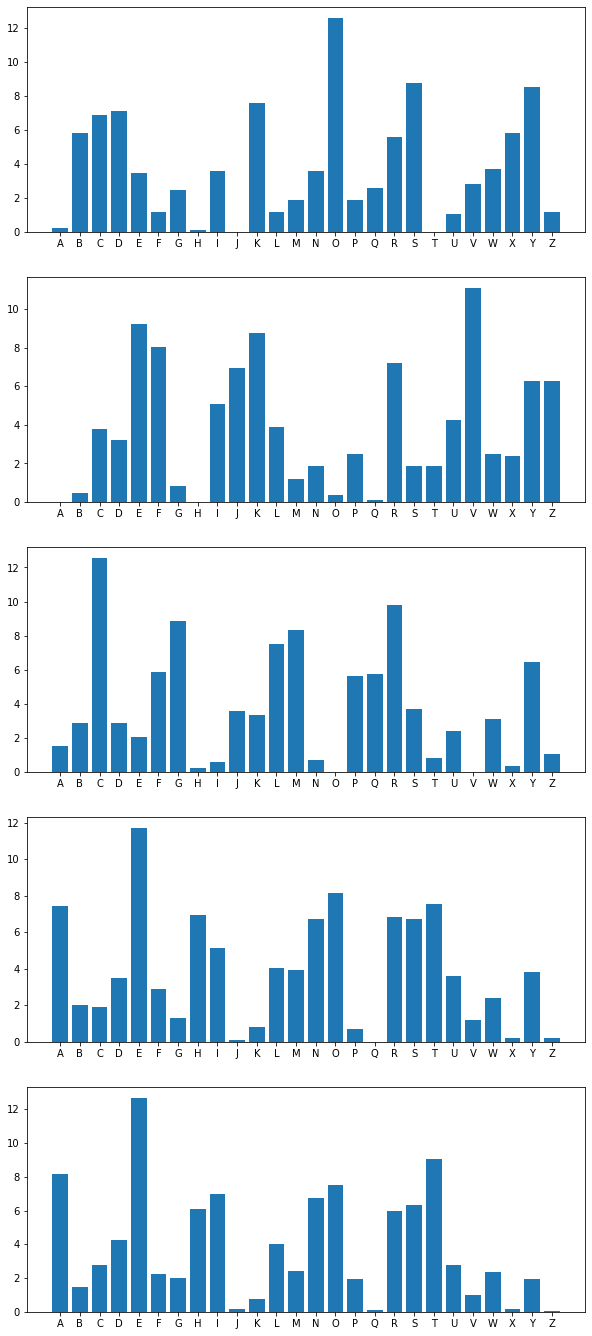

In [ ]:
# Частотность букв английского алфавита в тексте
yal = np.array([8.17, 1.49, 2.78, 4.25, 12.70, 2.23, 2.02, 6.09, 6.97, 0.15, 0.77, 4.03, 2.41, 6.75, 7.51, 1.93, 0.10, 5.99, 6.33, 9.06, 2.76, 0.98, 2.36, 0.15, 1.97, 0.07])
# Выводим гистограммы частот символов по группам:
fig, axes = plt.subplots(keylen+1, 1)
for i in range(keylen):
  axes[i].bar(alphabet, frequencies[i].values())
axes[keylen].bar(alphabet, yal)
fig.set_figwidth(10)
fig.set_figheight(24) 
plt.show()

In [ ]:
def shift(x):
  e = np.empty_like(x)
  e[0] = x[-1]
  e[1:] = x[:-1]
  return e

# Применяем частотный анализ: считаем, какой сдвиг
# наиболее похож на частотность букв англ. алфавита
sums = [[] for i in range(keylen)]
for i in range(keylen):
  gr = np.array(list(frequencies[i].values()))
  for _ in range(n):
    sums[i].append(sum((gr - yal) ** 2))
    gr = shift(gr)

keyfound = ''
for s in sums:
  smin = np.array(s).argmin()
  keyfound += alphabet[(n - smin) % n]
print('Found keyword:', keyfound)


Found keyword: KRYA


In [ ]:
# Восстанавливаем исходный текст по ключу
keyfoundstring = keyfound * (textlen // keylen) + keyfound[:(textlen % keylen)]
foundtext = ''
for m, k in zip(ciphertext, keyfoundstring):
  if m in alphabet:
    ind = (alphabet.index(m) - alphabet.index(k)) % n
    foundtext += alphabet[ind]
  else:
    foundtext += m
foundtext

'IT IS A TRUTH UNIVERSALLY ACKNOWLEDGED, THAT A SINGLE MAN IN POSSESSION OF A GOOD FORTUNE, MUST BE IN WANT OF A WIFE. HOWEVER LITTLE KNOWN THE FEELINGS OR VIEWS OF SUCH A MAN MAY BE ON HIS FIRST ENTERING A NEIGHBOURHOOD, THIS TRUTH IS SO WELL FIXED IN THE MINDS OF THE SURROUNDING FAMILIES, THAT HE IS CONSIDERED THE RIGHTFUL PROPERTY OF SOME ONE OR OTHER OF THEIR DAUGHTERS. MY DEAR MR. BENNET, SAID HIS LADY TO HIM ONE DAY, HAVE YOU HEARD THAT NETHERFIELD PARK IS LET AT LAST? MR. BENNET REPLIED THAT HE HAD NOT. BUT IT IS, - RETURNED SHE; - FOR MRS. LONG HAS JUST BEEN HERE, AND SHE TOLD ME ALL ABOUT IT. MR. BENNET MADE NO ANSWER. DO YOU NOT WANT TO KNOW WHO HAS TAKEN IT? - CRIED HIS WIFE IMPATIENTLY. - YOU WANT TO TELL ME, AND I HAVE NO OBJECTION TO HEARING IT. THIS WAS INVITATION ENOUGH. WHY, MY DEAR, YOU MUST KNOW, MRS. LONG SAYS THAT NETHERFIELD IS TAKEN BY A YOUNG MAN OF LARGE FORTUNE FROM THE NORTH OF ENGLAND; THAT HE CAME DOWN ON MONDAY IN A CHAISE AND FOUR TO SEE THE PLACE, AND WA